## Homework 6 - Jakub Kuśmierski

### Initialization of the environment

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

### Input data loading

In [2]:
#Input data loading
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

datasetName = "emnist-byclass-train"
datasetPath = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/EMNIST/gzip"
lastClassNumber = emnist_fcn.lastClassNumber

x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Training dataset","green"))
x_train, y_train = emnist_fcn.preprocessData(x,y)

datasetName = "emnist-byclass-test"
datasetPath = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/EMNIST/gzip"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Test dataset","green"))
x_test, y_test = emnist_fcn.preprocessData(x,y)

Training dataset
Test dataset


### Model definition

In [3]:
#model definition
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

inputShape = emnist_fcn.inputShapeConv
nOutputNeurons = emnist_fcn.nOutputNeurons
model = emnist_fcn.getConvModel(inputShape, nOutputNeurons)
nOutputNeurons = emnist_fcn.nOutputNeurons
model.summary()

2025-04-26 12:52:57.955890: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-04-26 12:52:57.955917: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-04-26 12:52:57.955921: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-04-26 12:52:57.955935: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-26 12:52:57.955947: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "conv"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,948 (620.89 KB)

 Trainable params: 158,948 (620.89 KB)

 Non-trainable params: 0 (0.00 B)

### Model training

Model: "conv"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,948 (620.89 KB)

 Trainable params: 158,948 (620.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


2025-04-26 12:53:00.461481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-04-26 12:53:00.467114: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 107ms/step - accuracy: 0.3910 - loss: 2.2257 - val_accuracy: 0.8574 - val_loss: 0.4257
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.7789 - loss: 0.6710 - val_accuracy: 0.8942 - val_loss: 0.3006
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.8275 - loss: 0.5135 - val_accuracy: 0.9085 - val_loss: 0.2593
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.8479 - loss: 0.4490 - val_accuracy: 0.9112 - val_loss: 0.2422
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.8611 - loss: 0.4115 - val_accuracy: 0.9181 - val_loss: 0.2288
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.8679 - loss: 0.3895 - val_accuracy: 0.9198 - val_loss: 0.2202
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.8748 - loss: 0.3674 - val_accuracy: 0.9209 - val_loss: 0.2187
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.8793 - loss: 0.3545 - val

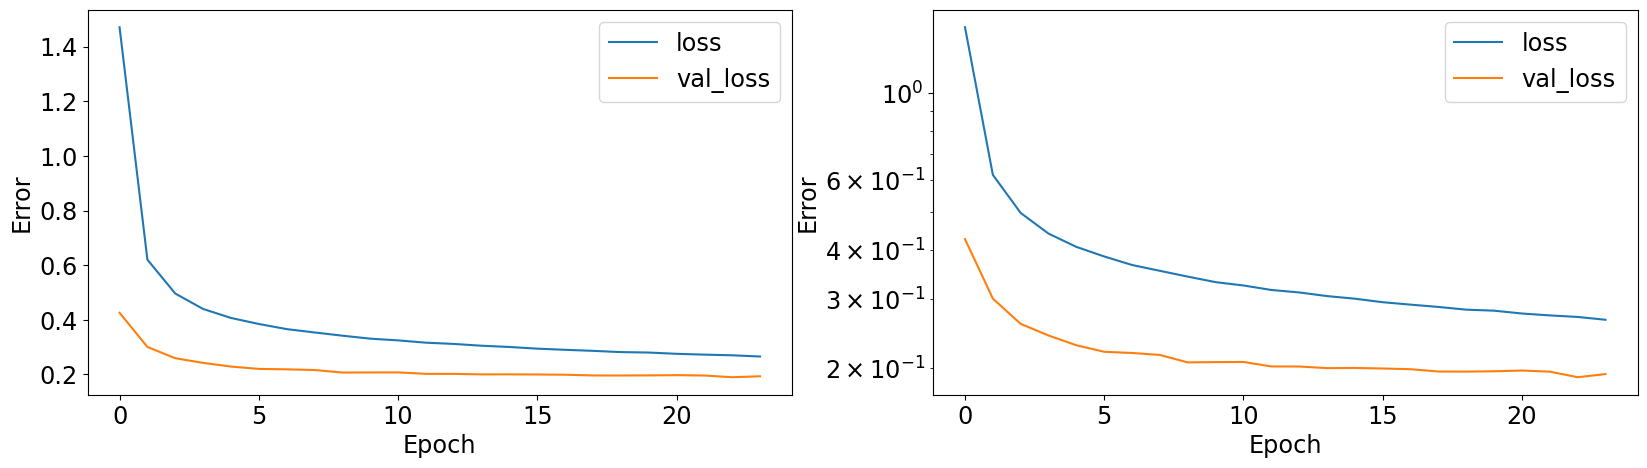

In [4]:
%%time
#model training
nEpochs = emnist_fcn.nEpochs
model = emnist_fcn.trainModel(model, x_train, y_train, nEpochs=nEpochs)

print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test);

### Evaluation

2025-04-26 13:02:59.352796: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


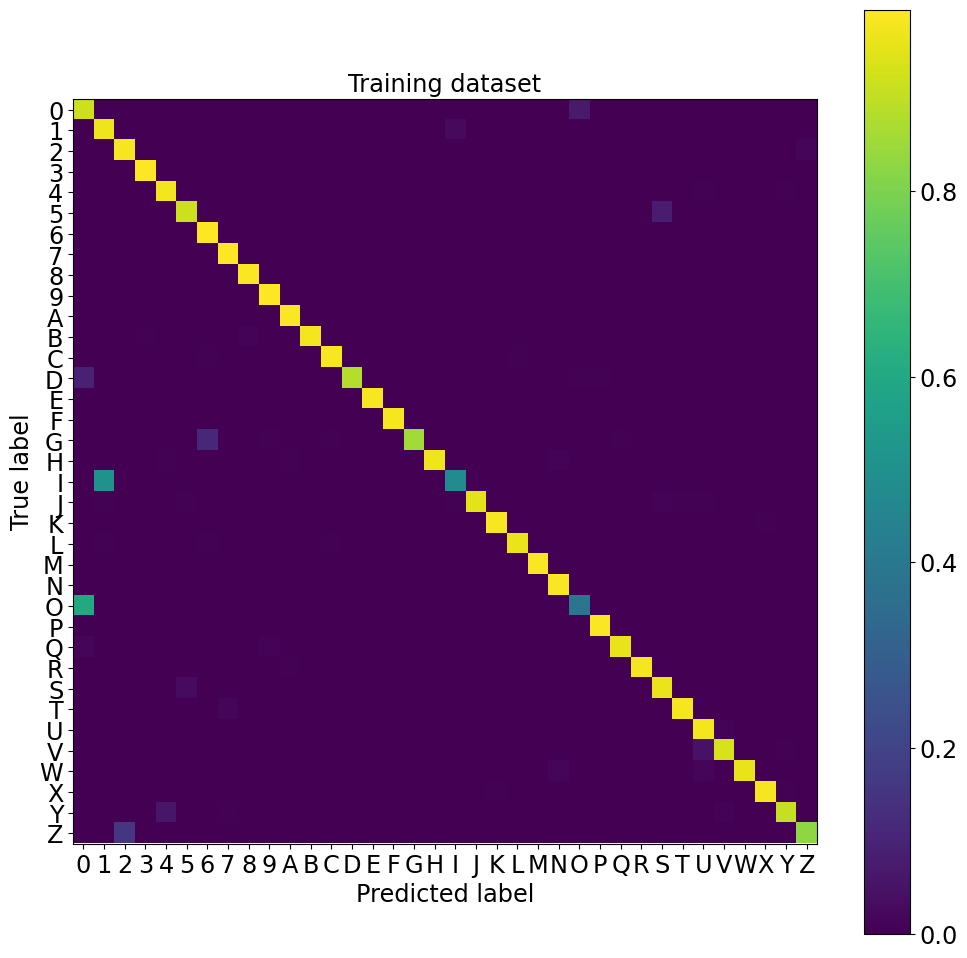

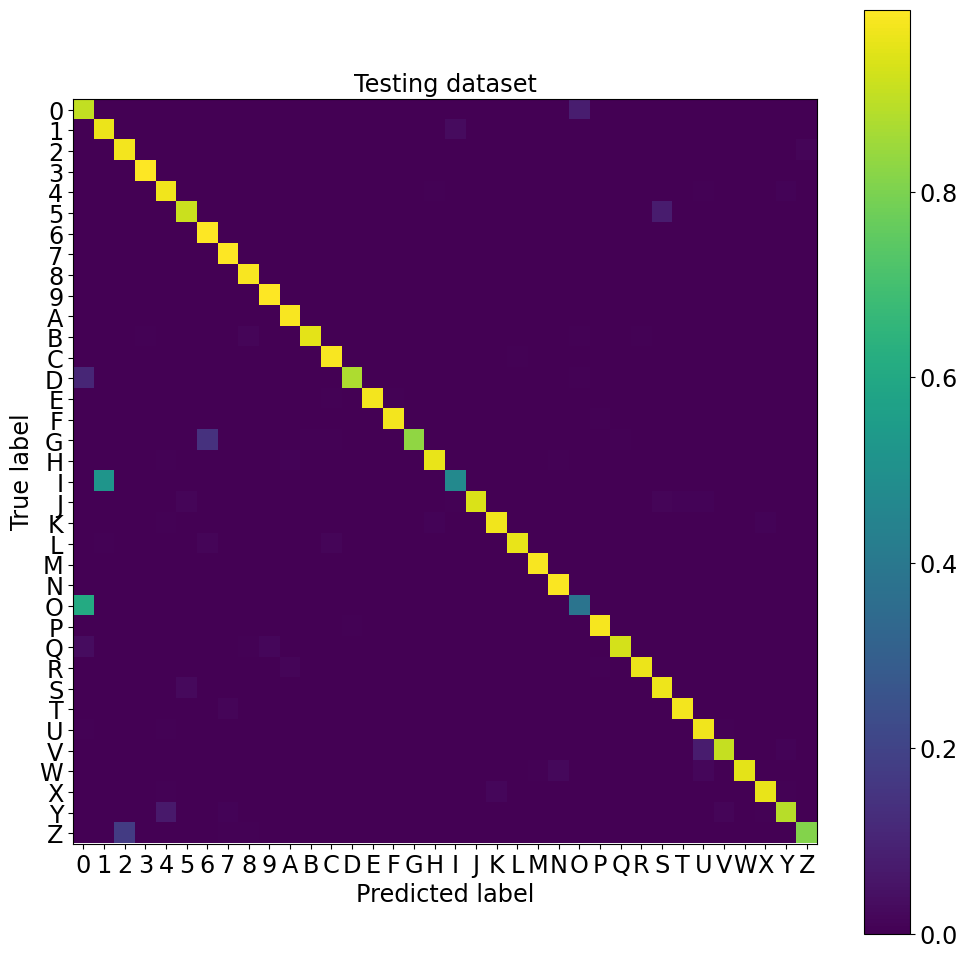

In [5]:
#evaluation
importlib.reload(emnist_fcn);
y_pred = tf.argmax(model.predict(x_train, batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_train, y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test,batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_test, y_pred,"Testing")

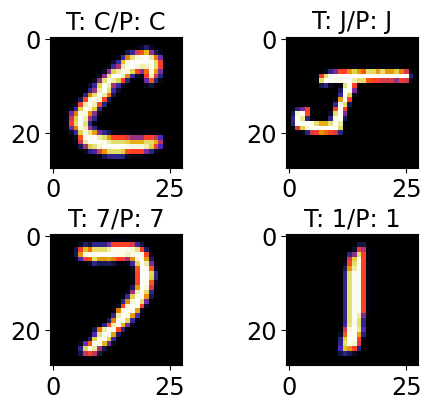

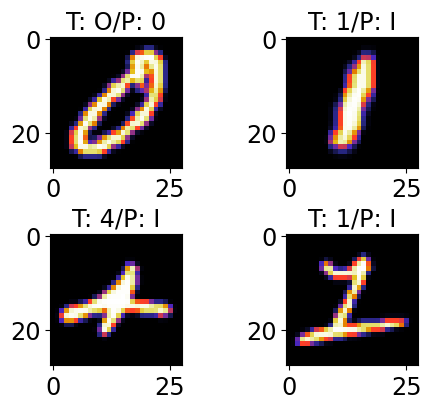

In [6]:
emnist_fcn.plotMNIST(x_test, y_test, y_pred)
mask = y_test != y_pred
emnist_fcn.plotMNIST(x_test[mask], y_test[mask], y_pred[mask])

### Message decoding

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Decoded message is: THE CAKE IS A L1E


array([[2.25426384e-15, 8.97909391e-09, 2.27117752e-11, 5.43133906e-11,
        1.28522271e-11, 1.73962306e-07, 8.94928171e-15, 7.79301104e-08,
        4.02354745e-14, 4.29923180e-11, 3.13197615e-14, 1.01448342e-17,
        2.34400190e-14, 1.50202022e-13, 1.48154321e-16, 2.03923355e-06,
        1.01812149e-14, 2.61368262e-17, 8.17812816e-06, 1.80200425e-06,
        1.62760170e-11, 2.63614786e-13, 3.96179290e-15, 5.30322270e-12,
        5.37147692e-13, 3.51566622e-13, 2.16661841e-19, 1.10384256e-20,
        2.17978885e-10, 9.99987721e-01, 2.36153480e-14, 5.91346417e-16,
        4.20868649e-14, 4.83092807e-14, 2.82273627e-09, 1.31669544e-14],
       [2.21154225e-15, 6.82765863e-17, 3.47489433e-11, 2.72913910e-16,
        1.29052799e-03, 4.26821495e-14, 1.95623167e-13, 7.25945251e-14,
        1.16689408e-10, 1.27986935e-11, 7.57915550e-05, 1.02147165e-15,
        1.05996002e-16, 2.66793303e-16, 2.86589071e-16, 3.32170158e-09,
        1.17016929e-08, 9.98471797e-01, 5.03405346e-17, 7.27874

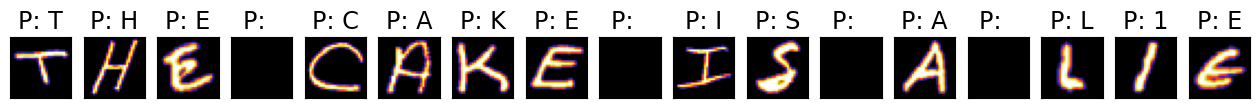

In [7]:
#message decoding
importlib.reload(emnist_fcn);
fileName = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

emnist_fcn.decodeMessage(model, encoded)